## **Importing Libraries**

In [1]:
%%capture
!pip install mordred
!pip install rdkit


In [2]:
# Importing Libraries
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem

import mordred
from mordred import Calculator, descriptors


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [4]:
df = pd.read_csv('2-RDKIT 2D descriptors RDKIT.csv')

## **Data Preprocessing**



1.   Removing missing values/non-numerical values
2.   Remove constant values
3.   Remove highly correlated values





In [5]:
# If you want to remove the duplicates:
df = df.drop_duplicates(keep='first')

In [6]:
df.shape

(15317, 209)

In [7]:
df.head()

,values,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,10.467731,-4.487461,10.467731,1.696759,0.424095,126.004,122.980,125.971810,42,...,0,0,0,0,0,0,0,0,0,0
1,1,9.163315,-4.433800,9.163315,0.008726,0.937072,307.441,282.241,307.204848,120,...,0,0,0,0,0,0,0,0,0,0
2,1,16.630408,-8.173020,16.630408,2.011766,0.237873,733.937,666.401,733.461241,298,...,0,0,0,0,0,0,0,0,0,0
3,1,16.153679,-4.142295,16.153679,0.117580,0.730424,389.387,369.227,389.149932,148,...,0,0,0,0,0,0,0,0,0,0
4,1,9.531285,-5.872222,9.531285,1.499618,0.164624,496.558,456.238,496.274444,200,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.isnull().sum().sum()

4089

In [9]:
column_num = []
column_bool = []
for column in df.columns:
  column_type = df[column].dtype
  if column_type == 'object':
      pass
  elif column_type =='bool':
      column_bool.append(column)
  else:
      column_num.append(column)

In [10]:
len(column_num)

209

In [11]:
column_bool

[]

In [12]:
# prompt: remove null values data.isnull().sum().sum()

# Remove rows with any null values
data = df.dropna()

#Verify that there are no more null values
print(data.isnull().sum().sum())


0


In [13]:
data.isnull().sum().sum()

0

In [14]:
data.shape

(14840, 209)

In [15]:
# To calclulate  Correlation and remove highly  correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
# Dropping highly correlated Features
corr_features = correlation(data, 0.80)
print("No. of features to drop : ",len(set(corr_features)))

data.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  68


C:\Users\saturn\AppData\Local\Temp\ipykernel_888\3426440214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(corr_features,axis=1,inplace=True)


In [17]:
data.shape

(14840, 141)

In [18]:
data.head()

,values,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,10.467731,-4.487461,1.696759,0.424095,126.004,0,0.432622,-0.472198,1.714286,...,0,0,0,0,0,0,0,0,0,0
1,1,9.163315,-4.433800,0.008726,0.937072,307.441,0,0.118715,-0.326392,1.260870,...,0,0,0,0,0,0,0,0,0,0
2,1,16.630408,-8.173020,2.011766,0.237873,733.937,0,0.311188,-0.458937,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,1,16.153679,-4.142295,0.117580,0.730424,389.387,0,0.340725,-0.477497,1.785714,...,0,0,0,0,0,0,0,0,0,0
4,1,9.531285,-5.872222,1.499618,0.164624,496.558,0,0.211046,-0.390604,1.176471,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.shape

(14840, 141)

In [20]:
data['values'].value_counts()

values
1    8621
0    6219
Name: count, dtype: int64

C:\Users\saturn\AppData\Local\Temp\ipykernel_888\860550600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["values"], palette="coolwarm")  # Replace "target" with actual column name


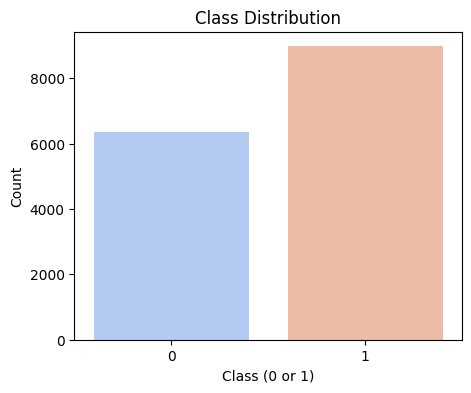

In [21]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df["values"], palette="coolwarm")  # Replace "target" with actual column name
plt.title("Class Distribution")
plt.xlabel("Class (0 or 1)")
plt.ylabel("Count")
plt.show()

In [22]:
#target class is in values column. it is not balanced. balance it using undersampling, by removing majority class samples 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(data.drop('values', axis=1), data['values'])
# Combine the resampled features and target variable
X_resampled = pd.DataFrame(X_resampled, columns=data.drop('values', axis=1).columns)
y_resampled = pd.DataFrame(y_resampled, columns=['values'])

# Print the shape of the resampled dataset
print(X_resampled.shape)
print(y_resampled.shape)

(12438, 140)
(12438, 1)


In [23]:
#scale and then merge the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X_resampled), columns = X_resampled.columns)


c:\Users\saturn\miniconda3\Lib\site-packages\sklearn\utils\extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\saturn\miniconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\saturn\miniconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\saturn\miniconda3\Lib\site-packages\sklearn\preprocessing\_data.py:81: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [28]:
#reset the axis and then merge the data
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)
# Merge the features and target variable back into a single DataFrame
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [29]:
resampled_data.shape

(12438, 141)

In [30]:
resampled_data.tail()

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,values
12433,1.400509,-0.014708,-0.090990,0.369284,0.414683,-0.015532,0.684565,-0.503137,-0.012471,0.438710,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,1
12434,0.326244,-1.123400,0.052508,0.702687,0.387262,-0.015532,1.785026,0.796020,-0.593116,0.868409,...,-0.308899,6.450022,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,1
12435,-0.253253,1.049610,-0.719849,0.988620,-0.896486,-0.015532,-0.457522,0.984037,0.294846,0.608987,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,1
12436,1.069144,0.092805,0.042475,1.156355,-0.366746,-0.015532,-1.273851,1.930254,-0.363690,-1.490621,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,1
12437,-1.529267,0.080344,-0.737893,-0.119069,-0.156009,-0.015532,-2.198242,-0.742324,-0.831982,0.401065,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,1


In [31]:
resampled_data['values'].value_counts()

values
0    6219
1    6219
Name: count, dtype: int64

In [40]:
resampled_data.head()

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,values
0,-1.975097,0.773038,0.118199,-0.550435,-1.138219,-0.015532,0.539971,0.326962,0.777772,-1.490621,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,0
1,-0.390049,0.809107,0.453472,-0.292014,-0.214500,-0.015532,0.254125,0.126925,-1.822600,0.590589,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,0
2,0.663835,-1.687523,-0.327387,0.235800,0.559670,-0.015532,-0.335973,0.591009,0.170665,0.560570,...,2.721141,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,0
3,0.895697,-1.919856,1.275505,-0.025907,0.802153,-0.015532,-0.535933,-0.741751,0.142343,0.404018,...,5.751182,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,0
4,-0.201355,0.071728,0.204196,-0.158287,-0.693134,-0.015532,0.273600,0.721944,0.133870,-1.490621,...,-0.308899,-0.142038,-0.075799,-0.099541,-0.199179,0.0,-0.149922,0.0,-0.224855,0


values
0    6219
1    6219
Name: count, dtype: int64


C:\Users\saturn\AppData\Local\Temp\ipykernel_888\2852483286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=resampled_data["values"], palette="coolwarm")


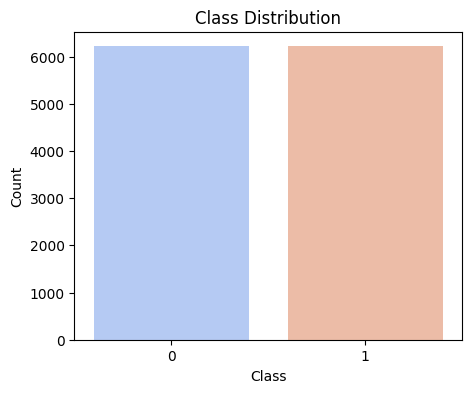

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count each class and store in a variable
class_counts = resampled_data['values'].value_counts()

# Print the class counts
print(class_counts)

# Create a countplot
plt.figure(figsize=(5, 4))
sns.countplot(x=resampled_data["values"], palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Save the DataFrame to a CSV file
resampled_data.to_csv('RDkit-2D_scaled_data.csv', index=False)